In [5]:
!pip install missingno


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import zscore
import missingno as msno

In [3]:
# Step 1:I used pandas to Load dataset
df = pd.read_csv("titanic.csv")  
df_original = df.copy()  # Just a backup, I included this just for comparision

In [4]:
# Step 2: here is the Basic Info of the dataset
print("\nInitial Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical summary:\n", df.describe())


Initial Shape: (891, 12)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Statistical summary:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.35

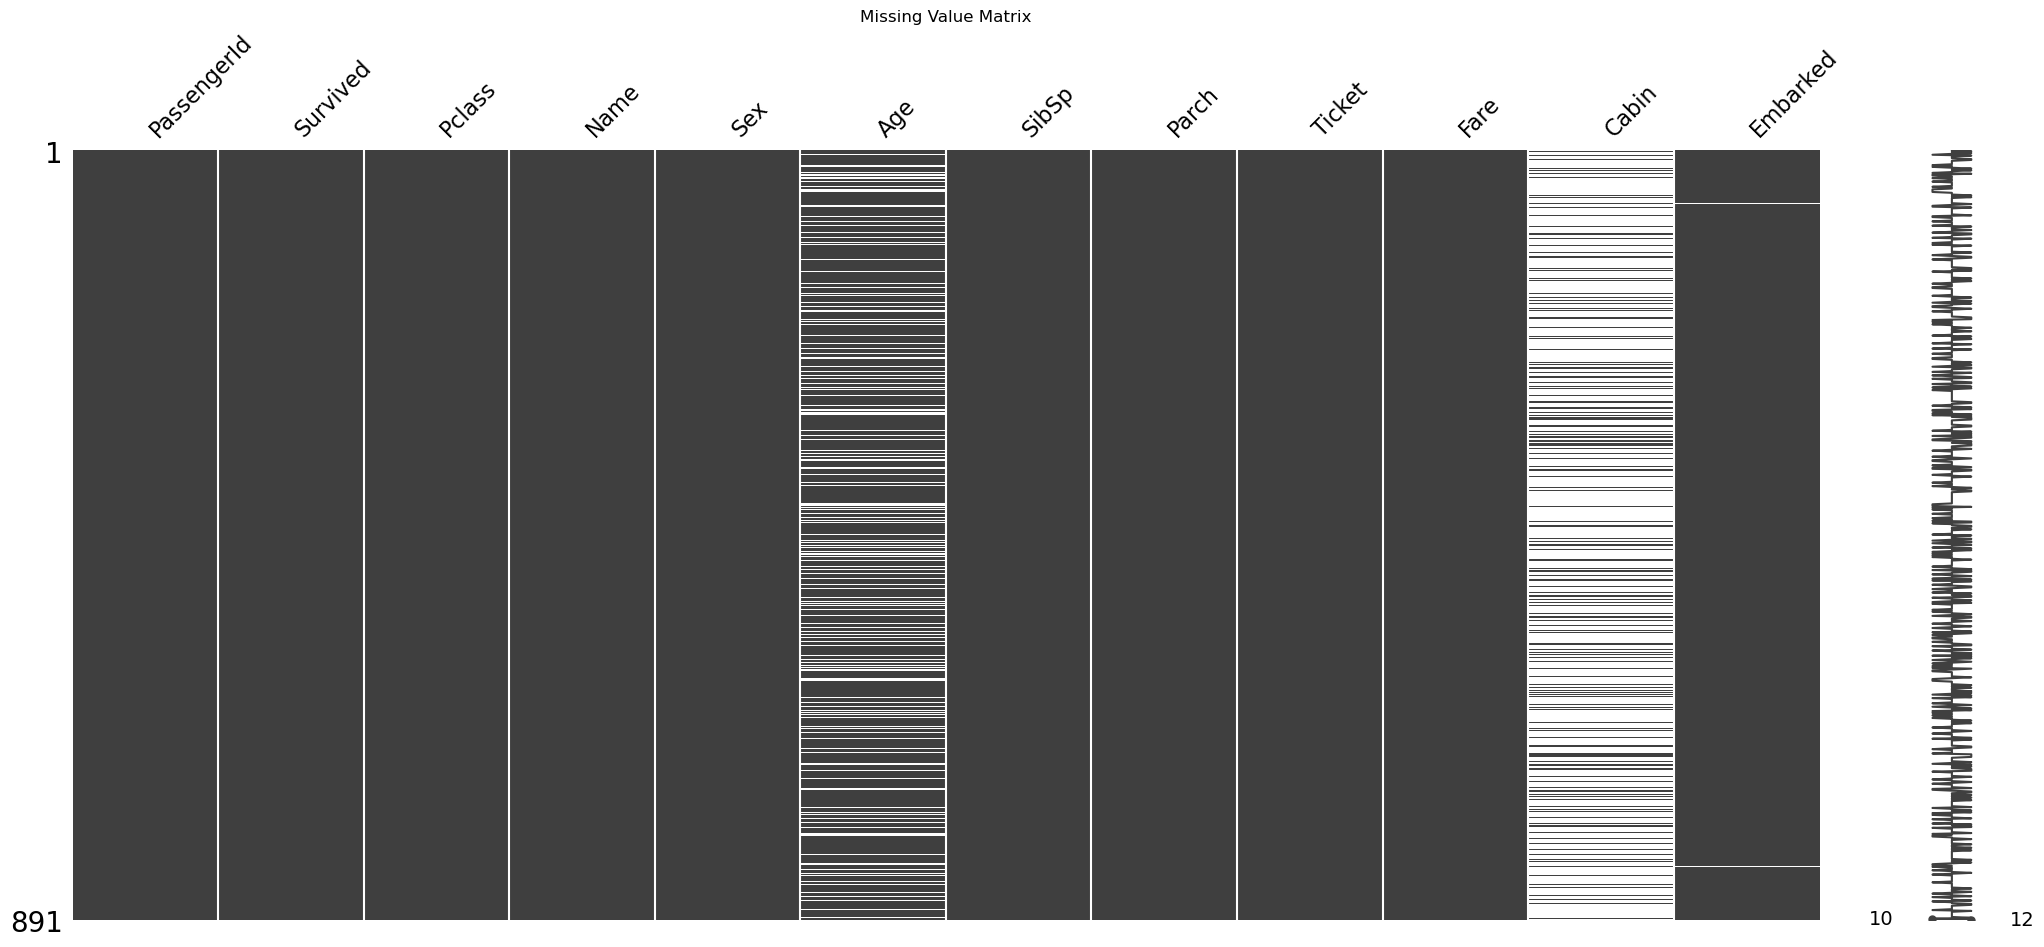

In [5]:
# Step 3: Visualizing the Missing Data in a matrix form
#heatmap
msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

In [6]:
# Step 4: how to Handle missing values
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
# Step 5: Drop duplicates if present in the dataset
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)


Duplicate rows: 0


In [8]:
# Step 6: Fixing of data types of the entities
def fix_column_types(df):
    for col in df.select_dtypes(include='object'):
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    for col in df.columns:
        if 'date' in col.lower():
            try:
                df[col] = pd.to_datetime(df[col])
            except:
                pass
fix_column_types(df)

In [9]:
# Step 7: Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [10]:
# Step 8: Group rare categories (it is not mandatory for all types of dataset)
#if necessary we can go through this
threshold = 0.01
for col in df_original.select_dtypes(include='object'):
    freq = df_original[col].value_counts(normalize=True)
    rare = freq[freq < threshold].index
    df_original[col] = df_original[col].apply(lambda x: 'Other' if x in rare else x)

In [11]:
# Step 9: Skewness fix
from scipy.stats import skew
for col in df.select_dtypes(include=np.number).columns:
    if abs(skew(df[col])) > 1:
        df[col] = np.log1p(df[col] + 1)

In [12]:
# Step 10: Outlier Detection using Z-Score
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
df = df[(z_scores < 3).all(axis=1)]

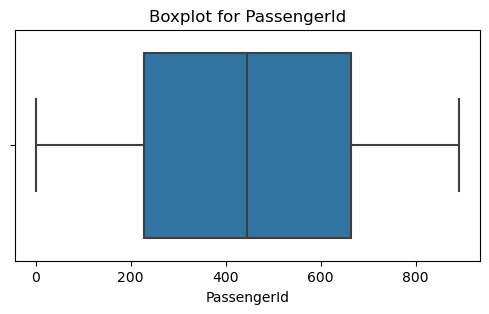

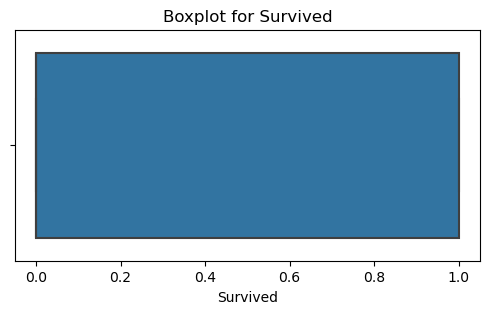

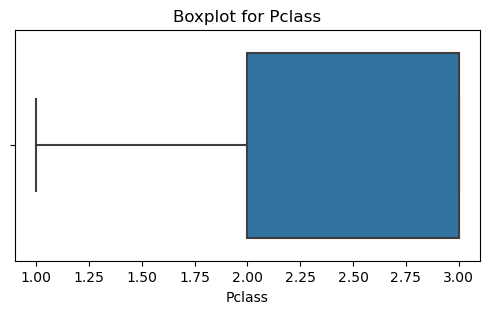

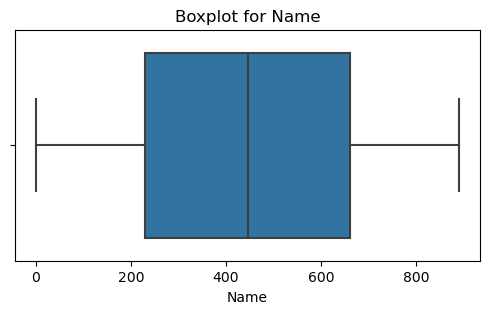

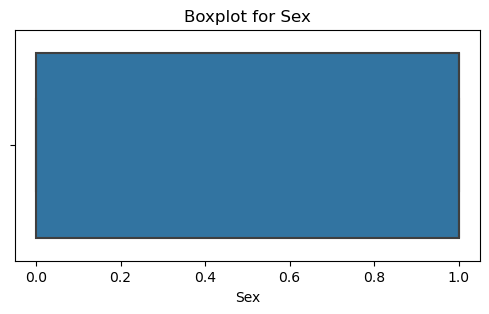

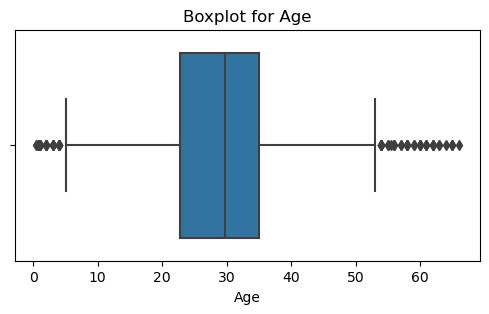

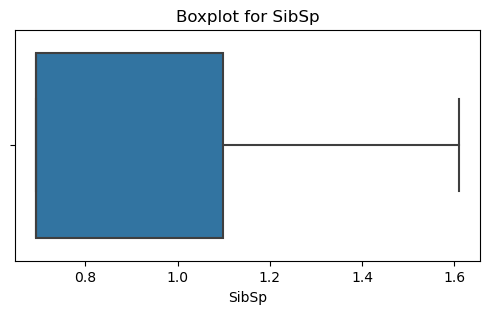

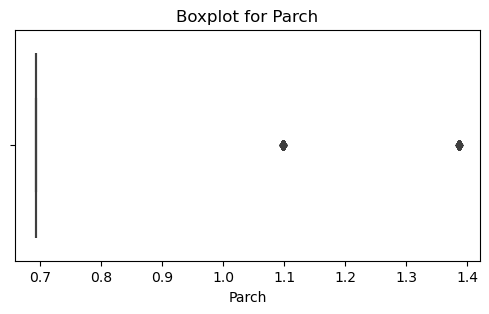

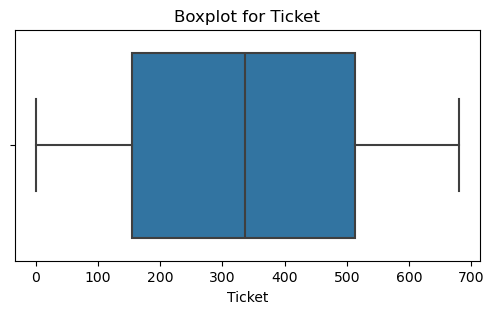

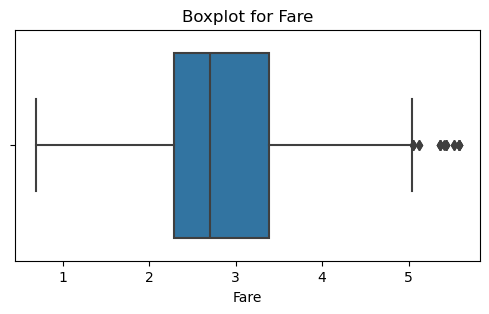

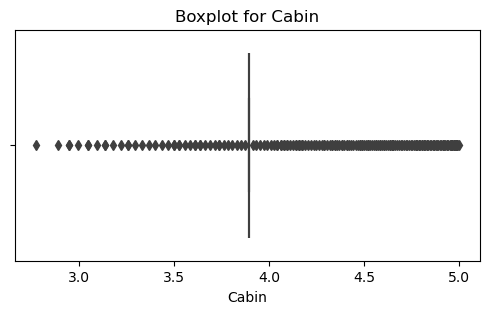

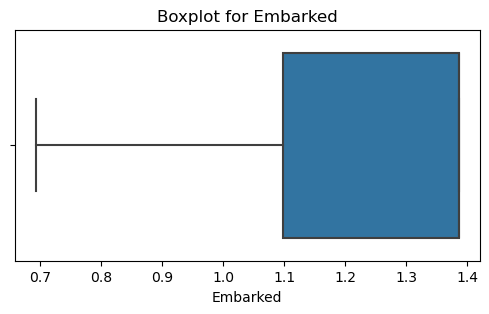

In [13]:
# Step 11: Boxplots to visualize cleaned data
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [14]:
# Step 12: Normalize/Standardize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [15]:
# Step 13: Final Summary
def cleaning_summary(df):
    print("\nCleaning Summary")
    print("Final Shape:", df.shape)
    print("Remaining Nulls:\n", df.isnull().sum()[df.isnull().sum() > 0])
    print("Numerical Columns:", list(df.select_dtypes(include=np.number).columns))
    print("Categorical Columns:", list(df.select_dtypes(include='object').columns))

cleaning_summary(df)


Cleaning Summary
Final Shape: (824, 12)
Remaining Nulls:
 Series([], dtype: int64)
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Categorical Columns: []


In [16]:
# Step 14: Save cleaned data
df.to_csv("cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'
